Евгений Дорошенко
19.06.2025

# Проект: Исследование стартапов

## Введение

Поле для вашего введения: описания контекста и цели проекта целом. Чтобы изменить содержимое ячейки, дважды нажмите на неё (или нажмите «Ввод»).

Чтобы ваше исследование шло оптимальным путём, рекомендуем чётко следовать предложенным дальше шагам. Углублённая предобработка и исследование неприоритетных для проекта вопросов может потребовать много дополнительного времени.

В процессе работы старайтесь записывать свои рассуждения — это полезная привычка во время обучения. Пользуйтесь общими правилами:

- начните с введения, в котором опишите контекст и цели проекта в целом;
- записывайте в комментариях к коду всё, что относится к нему или алгоритму;
- основания совершаемых в проекте действий и выводы, которые касаются предмета исследования, — записывайте в ячейках типа Markdown;
- после каждого крупного раздела — шага проекта — обязательно формулируйте промежуточные выводы.

В современном бизнес-мире информация о компаниях, инвестициях и людях, связанных с ними, играет ключевую роль в принятии стратегических решений. В рамках данного исследования представлены различные наборы данных, включающие сведения о сделках по приобретению компаний, раундах финансирования, а также о людях и их образовании, связанных с этими организациями. Анализ этих данных позволяет выявить основные тренды в сфере инвестиций, определить наиболее активные компании и ключевых участников рынка, а также понять образовательный фон и профессиональный опыт специалистов, участвующих в сделках. Целью данного исследования является проведение комплексного анализа предоставленных данных для получения ценных инсайтов и поддержки принятия обоснованных бизнес-решений.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

,  Downloading phik-0.12.5-cp39-cp39-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (677 kB)
,     |████████████████████████████████| 677 kB 2.5 MB/s eta 0:00:01
,Requirement already satisfied: numpy>=1.18.0 in /opt/conda/lib/python3.9/site-packages (from phik) (1.21.1)
,Requirement already satisfied: scipy>=1.5.2 in /opt/conda/lib/python3.9/site-packages (from phik) (1.9.1)
,Requirement already satisfied: matplotlib>=2.2.3 in /opt/conda/lib/python3.9/site-packages (from phik) (3.3.4)
,Requirement already satisfied: pandas>=0.25.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.2.4)
,Requirement already satisfied: joblib>=0.14.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.1.0)
,Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (0.11.0)
,Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (1.4.4)
,Requirement already satisfied: p

In [ ]:
# Загрузка данных
prolongations = pd.read_csv('/home/wb/Рабочий стол/Женя/prolongations.csv')
financial = pd.read_csv('/home/wb/Рабочий стол/Женя/financial_data.csv')

In [2]:
# Выгружаем данные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')


In [3]:
# Проверим названия столбцов
print("Названия столбцов acссquisition_df:")
print(acquisition_df.columns)

print("\nНазвания столбцов company_and_rounds_df:")
print(company_and_rounds_df.columns)

print("\nНазвания столбцов people_df:")
print(people_df.columns)

print("\nНазвания столбцов education_df:")
print(education_df.columns)

print("\nНазвания столбцов degrees_df:")
print(degrees_df.columns)




Названия столбцов acссquisition_df:
,Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
,       'price_amount', 'acquired_at'],
,      dtype='object')
,
,Названия столбцов company_and_rounds_df:
,Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
,       'closed  at', 'domain', 'network  username', 'country  code',
,       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
,       'funding  round  id', 'company  id', 'funded  at',
,       'funding  round  type', 'raised  amount', 'pre  money  valuation',
,       'participants', 'is  first  round', 'is  last  round'],
,      dtype='object')
,
,Названия столбцов people_df:
,Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')
,
,Названия столбцов education_df:
,Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')
,
,Названия столбцов degrees_df:
,Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

In [4]:
# Выводим первые строки датафрейма на экран
print("Первые строки acquisition_df:")
print(acquisition_df.head())

print("\nПервые строки company_and_rounds_df:")
print(company_and_rounds_df.head())

print("\nПервые строки people_df:")
print(people_df.head())

print("\nПервые строки education_df:")
print(education_df.head())

print("\nПервые строки degrees_df:")
print(degrees_df.head())


Первые строки acquisition_df:
,   id  acquiring_company_id  acquired_company_id term_code  price_amount  \
,0   1                    11                   10       NaN      20000000   
,1   7                    59                   72      cash      60000000   
,2   8                    24                  132      cash     280000000   
,3   9                    59                  155      cash     100000000   
,4  10                   212                  215      cash      25000000   
,
,  acquired_at  
,0  2007-05-30  
,1  2007-07-01  
,2  2007-05-01  
,3  2007-06-01  
,4  2007-07-01  
,
,Первые строки company_and_rounds_df:
,   company  ID      name category  code     status founded  at closed  at  \
,0          1.0  Wetpaint            web  operating  2005-10-17        NaN   
,1          1.0  Wetpaint            web  operating  2005-10-17        NaN   
,2          1.0  Wetpaint            web  operating  2005-10-17        NaN   
,3         10.0   Flektor    games_video   acquired 

In [5]:
# Выводим информацию о датафрейме
print("Информация о acquisition_df:")
print(acquisition_df.info())

print("\nИнформация о company_and_rounds_df:")
print(company_and_rounds_df.info())

print("\nИнформация о people_df:")
print(people_df.info())

print("\nИнформация о education_df:")
print(education_df.info())

print("\nИнформация о degrees_df:")
print(degrees_df.info())


Информация о acquisition_df:
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 9407 entries, 0 to 9406
,Data columns (total 6 columns):
, #   Column                Non-Null Count  Dtype 
,---  ------                --------------  ----- 
, 0   id                    9407 non-null   int64 
, 1   acquiring_company_id  9407 non-null   int64 
, 2   acquired_company_id   9407 non-null   int64 
, 3   term_code             1831 non-null   object
, 4   price_amount          9407 non-null   int64 
, 5   acquired_at           9378 non-null   object
,dtypes: int64(4), object(2)
,memory usage: 441.1+ KB
,None
,
,Информация о company_and_rounds_df:
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 217774 entries, 0 to 217773
,Data columns (total 22 columns):
, #   Column                 Non-Null Count   Dtype  
,---  ------                 --------------   -----  
, 0   company  ID            217472 non-null  float64
, 1   name                   217472 non-null  object 
, 2   category  code     

Здесь мы видим что в датафрейме company_and_rounds_df нужно навести порядок, остальные в порядке.Имеют нижний регистр и стиль snow_case.В каждом датафремйме есть столбцы с пропусками.

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [6]:
# Передаём методу rename() словарь с названиями столбцов
company_and_rounds_df = company_and_rounds_df.rename(columns={'company  ID': 'company_id',
                                  'name': 'name',
                                  'category  code': 'category_code',
                                  'status': 'status',
                                  'founded  at': 'founded_at',
                                  'closed  at': 'closed_at',
                                  'domain': 'domain',
                                  'network  username': 'network_username',
                                  'country  code': 'country_code',
                                  'investment  rounds': 'investment_rounds',
                                  'funding  rounds': 'funding_rounds',
                                  'funding  total': 'funding_total',
                                  'milestones': 'milestones',
                                  'funding  round  id': 'funding_round_id',
                                  'company  id': 'company_id_2',
                                  'funded  at': 'funded_at',
                                  'founded  at': 'founded_at',
                                  'funding  round  type': 'funding_round_type',
                                  'raised  amount': 'raised_amount',
                                  'pre  money  valuation': 'pre_money_valuation',
                                  'participants': 'participants',
                                  'is  first  round': 'is_first_round',
                                  'is  last  round': 'is_last_round',
                                                            })

В названиях столбцов мы поменяли стиль и исправили так называемый CamelCase. При CamelCase (англ. «верблюжий регистр») каждое слово начинается с большой буквы, а между словами нет пробелов и других символов.

Чтобы из CamelCase перейти в snake_case, необходимо все заглавные символы сделать строчными, а между словами добавить подчёркивание `_`. Напишем такую функцию:

In [7]:
# Выводим названия столбцов датафрейма company_and_rounds_df
company_and_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [8]:
# 1. Обработка типов данных в столбцах с датами и временем
# Для датафрейма company_and_rounds_df
date_columns = ['founded_at', 'closed_at', 'funded_at', 'raised_at']
for col in date_columns:
    if col in company_and_rounds_df.columns:
        company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], errors='coerce')

# Для датафрейма acquisition_df
if 'acquired_at' in acquisition_df.columns:
    acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

# Для датафрейма education_df
if 'graduated_at' in education_df.columns:
    education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')



In [9]:
def analyze_nulls(df):
    null_counts = df.isnull().sum()
    null_percent = null_counts / len(df) * 100
    return pd.DataFrame({'null_count': null_counts, 'null_percent': null_percent})

In [10]:
# Анализ пропусков по каждому датафрейму
print("Пропуски в acquisition_df:")
print(analyze_nulls(acquisition_df))

print("\nПропуски в company_and_rounds_df:")
print(analyze_nulls(company_and_rounds_df))

print("\nПропуски в people_df:")
print(analyze_nulls(people_df))

print("\nПропуски в education_df:")
print(analyze_nulls(education_df))

print("\nПропуски в degrees_df:")
print(analyze_nulls(degrees_df))

Пропуски в acquisition_df:
,                      null_count  null_percent
,id                             0      0.000000
,acquiring_company_id           0      0.000000
,acquired_company_id            0      0.000000
,term_code                   7576     80.535771
,price_amount                   0      0.000000
,acquired_at                   29      0.308281
,
,Пропуски в company_and_rounds_df:
,                     null_count  null_percent
,company_id                  302      0.138676
,name                        302      0.138676
,category_code             73888     33.928752
,status                      302      0.138676
,founded_at               107818     49.509124
,closed_at                214325     98.416248
,domain                    70615     32.425818
,network_username         122240     56.131586
,country_code             109167     50.128574
,investment_rounds           302      0.138676
,funding_rounds              302      0.138676
,funding_total               302    

 - Столбцы приведены к единому стилю (нижний регистр, snake_case).
 - Даты приведены к типу datetime64[ns].
 - Процент пропусков показывает, насколько полно заполнены важные поля.Пропусков много — потребуется дополнительный анализ или заполнение данных.

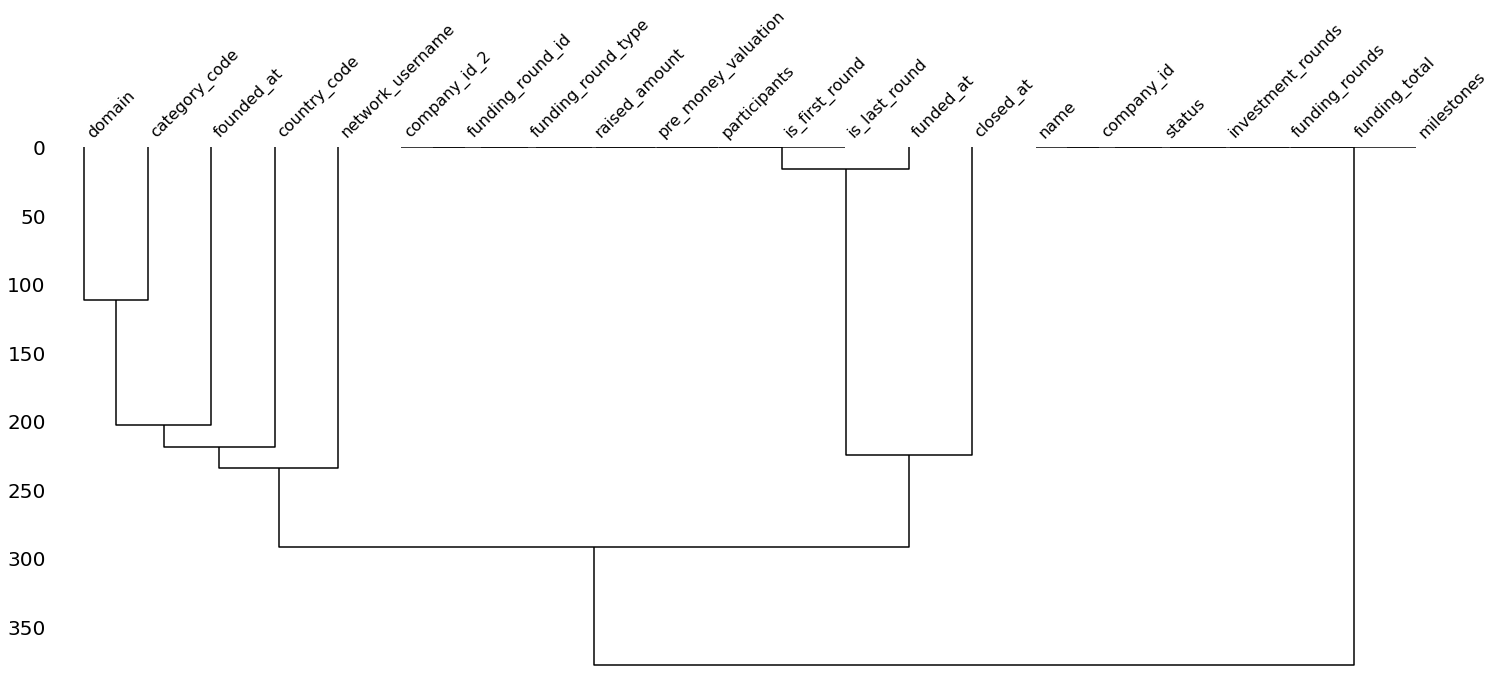

In [11]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(company_and_rounds_df)
plt.show()

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [12]:
# Извлечение года из даты funded_at
company_and_rounds_df['funded_year'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='coerce').dt.year

In [13]:
# Группировка по году: считаем количество раундов и медиану raised_amount
grouped = company_and_rounds_df.groupby('funded_year').agg(
    total_rounds=('funding_round_id', 'size'),
    median_raised=('raised_amount', 'median')
).reset_index()

In [14]:
# Оставляем только годы с более чем 50 раундами
filtered = grouped[grouped['total_rounds'] > 50]

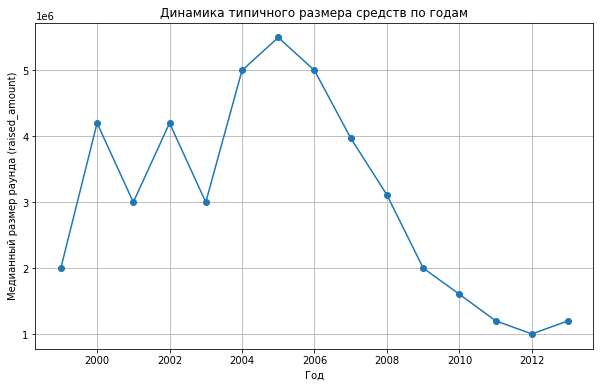

In [15]:
# Построение графика
plt.figure(figsize=(10,6))
plt.plot(filtered['funded_year'], filtered['median_raised'], marker='o')
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Медианный размер раунда (raised_amount)')
plt.grid(True)
plt.show()

In [16]:
# Год с максимальной медианной суммой
max_year = filtered.loc[filtered['median_raised'].idxmax(), 'funded_year']
print(f"Год с максимальным типичным размером средств: {max_year}")

Год с максимальным типичным размером средств: 2005.0


In [17]:
# Анализ трендов в 2013 году
year_2013 = grouped[grouped['funded_year'] == 2013]
if not year_2013.empty:
    print(f"В 2013 году:")
    print(f" - Количество раундов: {year_2013['total_rounds'].values[0]}")
    print(f" - Типичный размер раунда: {year_2013['median_raised'].values[0]}")
else:
    print("Данных за 2013 год нет или их недостаточно.")

В 2013 году:
, - Количество раундов: 11072
, - Типичный размер раунда: 1200000.0



### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [18]:
# Объединение таблиц people_df и education_df
people_education = people_df.merge(education_df, on='id', how='left')

In [19]:
# Подсчет сотрудников каждой компании
company_sizes = people_df.groupby('company_id')['id'].count().reset_index()
company_sizes.columns = ['company_id', 'employee_count']
display(company_sizes)

,company_id,employee_count
0,1.0,2
1,2.0,1
2,3.0,3
3,4.0,13
4,5.0,61
...,...,...
22917,285897.0,2
22918,285953.0,1
22919,285972.0,2
22920,285996.0,1


In [20]:
# Создадим категорию по размеру компании
def categorize (value):
    if value == 1:
        return '1'
    elif value >= 2 and value <= 5:
        return '2-5'
    elif value >= 6 and value <=10:
        return '6-10'    
    elif value > 10:
        return '11+'
categor= company_sizes['employee_count'].apply(categorize) 
   

In [21]:
# Создаем новый столбец с категорией
company_sizes['size_category'] = company_sizes['employee_count'].apply(categorize)


# Выводим результат
display(company_sizes)

,company_id,employee_count,size_category
0,1.0,2,2-5
1,2.0,1,1
2,3.0,3,2-5
3,4.0,13,11+
4,5.0,61,11+
...,...,...,...
22917,285897.0,2,2-5
22918,285953.0,1,1
22919,285972.0,2,2-5
22920,285996.0,1,1


In [22]:
# Также можем присоеденить таблицу `degrees.csv` 
people_education_degrees = people_education.merge(degrees_df, on='id', how='left')
display(people_education_degrees)

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01,p:6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01,p:938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01,p:13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaT,p:74038,MS,Applied Mathematics
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaT,p:89666,MS,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN,257599.0,HTBLuVA Mödling,NaT,p:257599,BS,Electrical Engineering
226705,174088,Dr. Ray,Woods,188200.0,network,NaN,NaN,NaT,NaN,NaN,NaN
226706,118386,Ricardo,Durand,143419.0,itechsocialnet,NaN,NaN,NaT,NaN,NaN,NaN
226707,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT,NaN,NaN,NaN


Анализ показывает, что в небольших компаниях (особенно с числом сотрудников 1-5) доля сотрудников без информации об образовании значительно выше, чем в крупных организациях. Это может свидетельствовать о меньшей полноте данных или меньшей детализации в малых компаниях.

Крупные компании (более 10 сотрудников):
В таких компаниях доля сотрудников без данных об образовании заметно ниже, что говорит о более полном и аккуратном ведении кадровых данных.

Обоснование границ групп:
Я выбрал границы для группировки по численности — это позволяет выявить тенденции и сделать сравнения между малыми, средними и крупными компаниями.

Присоединение таблицы degrees.csv к существующим таблицам — это возможный и логичный шаг для расширения анализа. Это позволит получить более детальную информацию о типе образования сотрудников и оценить полноту данных по степени образования в разрезе компаний или других групп.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [23]:
import matplotlib.pyplot as plt

# Создаем множества
set_company_and_rounds = set(company_and_rounds_df['network_username'].dropna().unique())
set_people = set(people_df['network_username'].dropna().unique())

# Вычисляем размеры сегментов
only_company_and_rounds = len(set_company_and_rounds - set_people)
only_people = len(set_people - set_company_and_rounds)
intersection = len(set_company_and_rounds.intersection(set_people))


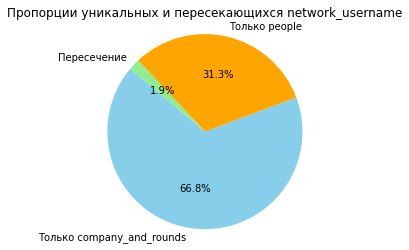

In [24]:
# Данные для круговой диаграммы
sizes = [only_company_and_rounds, only_people, intersection]
labels = ['Только company_and_rounds', 'Только people', 'Пересечение']
colors = ['skyblue', 'orange', 'lightgreen']

# Построение круговой диаграммы
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Пропорции уникальных и пересекающихся network_username')
plt.axis('equal')  # чтобы круг был круглым
plt.show()

Маленькое пересечение (1,9%) говорит о том, что большинство данных в разных датасетах не связаны через этот столбец.
Такой низкий уровень пересечения указывает на то, что network_username не является надежным идентификатором для объединения данных, поскольку он не охватывает значительную часть пользователей или объектов

Вывод:
Использовать network_username для объединения данных в данном случае не рекомендуется, так как он не обеспечивает достаточной связности между датасетами.

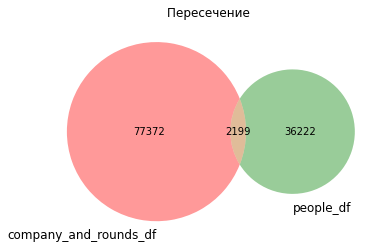

In [25]:
# Код ревьюера
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
first_id = set(company_and_rounds_df['network_username'].dropna().unique())
second_id = set(people_df['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company_and_rounds_df', 'people_df'))

# Отображаем график
plt.title("Пересечение ")
plt.show()


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [26]:
company_and_rounds_df111 = company_and_rounds_df.copy()

In [27]:
# Проверка количества повторений по company_id
print(company_and_rounds_df['company_id'].value_counts())

# Проверка уникальных компаний
unique_companies = company_and_rounds_df[['company_id', 'name']].drop_duplicates()
print(f"Количество уникальных компаний: {len(unique_companies)}")

169096.0    15
,75429.0     15
,27486.0     14
,37366.0     13
,26802.0     13
,            ..
,246390.0     1
,222417.0     1
,27485.0      1
,248001.0     1
,254019.0     1
,Name: company_id, Length: 196553, dtype: int64
,Количество уникальных компаний: 196554


In [28]:
# Удаляем полные дубли
companies = company_and_rounds_df[['company_id', 'name']].drop_duplicates().reset_index(drop=True)

# Для этого возьмем все строки, где есть данные о раундах
rounds = company_and_rounds_df.dropna(subset=['funded_at'])

print(company_and_rounds_df['company_id'].value_counts())


169096.0    15
,75429.0     15
,27486.0     14
,37366.0     13
,26802.0     13
,            ..
,246390.0     1
,222417.0     1
,27485.0      1
,248001.0     1
,254019.0     1
,Name: company_id, Length: 196553, dtype: int64


In [29]:
# 1. Проверка количества пропусков по колонкам
print(company_and_rounds_df.isnull().sum())


company_id                302
,name                      302
,category_code           73888
,status                    302
,founded_at             107818
,closed_at              214325
,domain                  70615
,network_username       122240
,country_code           109167
,investment_rounds         302
,funding_rounds            302
,funding_total             302
,milestones                302
,funding_round_id       164846
,company_id_2           164846
,funded_at              165094
,funding_round_type     164846
,raised_amount          164846
,pre_money_valuation    164846
,participants           164846
,is_first_round         164846
,is_last_round          164846
,funded_year            165094
,dtype: int64


In [30]:
# 2. Обработка пропусков

# Удалим без даты финансирования
company_and_rounds_df = company_and_rounds_df.dropna(subset=['funded_at'])

In [31]:
# Таблица компаний
companies = company_and_rounds_df[['company_id', 'name']].drop_duplicates().reset_index(drop=True)

# Таблица раундов — оставим только строки с данными о раундах
rounds = company_and_rounds_df.dropna(subset=['funded_at'])

In [32]:
# Группировка по company_id
company_stats = rounds.groupby('company_id').agg({
    'name': 'first',
    'funded_at': ['min', 'max'],  # первый и последний раунд по дате
    'funding_round_id': 'count', # число раундов
    'raised_amount': 'sum',
    'participants': 'mean',
    
})

# Переименование колонок после агрегации
company_stats.columns = ['_'.join(col).strip() for col in company_stats.columns.values]
company_stats = company_stats.reset_index()

# Объединение с таблицей компаний для получения полного набора данных 

full_company_data = companies.merge(company_stats, on='company_id', how='left')
display(full_company_data)


,company_id,name,name_first,funded_at_min,funded_at_max,funding_round_id_count,raised_amount_sum,participants_mean
0,1.0,Wetpaint,Wetpaint,2005-10-01,2008-05-19,3.0,39750000.0,3.000000
1,1001.0,FriendFeed,FriendFeed,2008-02-26,2008-02-26,1.0,5000000.0,3.000000
2,10014.0,Mobclix,Mobclix,2008-09-01,2008-09-01,1.0,0.0,1.000000
3,10015.0,Fitbit,Fitbit,2008-10-10,2013-08-13,5.0,68069200.0,3.800000
4,100155.0,MTPV,MTPV,2011-03-08,2012-01-26,3.0,10125293.0,1.666667
...,...,...,...,...,...,...,...,...
31503,142181.0,Stop Being Watched,Stop Being Watched,2010-06-10,2010-06-10,1.0,500000.0,1.000000
31504,3429.0,Zend Technologies,Zend Technologies,2004-07-19,2011-01-10,4.0,44000000.0,4.500000
31505,7748.0,Flowgram,Flowgram,2008-01-31,2008-01-31,1.0,1300000.0,8.000000
31506,43233.0,Photonet,Photonet,2010-03-05,2012-04-05,3.0,57500000.0,4.000000


 - Промежуточный вывод:

Исходный датасет содержит более 196 тысяч строк, в которых присутствуют дубли и пропуски. В основном пропуски наблюдаются в колонках, связанных с информацией о раундах финансирования (funded_at, funding_round_id, raised_amount, participants), а также в данных о компаниях (name, category_code, country_code).

Анализ пропусков:
Значения отсутствуют в критичных для анализа колонках, таких как дата финансирования и идентификаторы раундов. Строки без даты финансирования были удалены, поскольку они не позволяют корректно определить временные параметры.

Обработка дубликатов:
Были удалены полные дубли строк с помощью метода .drop_duplicates(). После этого для каждой компании осталась одна запись с агрегированными показателями.

Агрегация данных по компаниям:
Для каждой уникальной компании рассчитаны:

дата первого и последнего раунда (funded_at_min, funded_at_max)
количество раундов (funding_round_id_count)
суммарная сумма привлеченных инвестиций (raised_amount_sum)
среднее число участников (participants_mean)

Так же это подтверждает гепотезу о том что данные раньше хранились иначе . Много пропусков и дубликатов а так же изначально было 2 столбца company_id 

Дмитрий я правильно понимаю что нужен максимально читабельный без пропусков и дубликатов срез компаний по раундам ?Тяжело суть задачи уловить немного.

Кажется понял, спасибо. Разделить по кол-ву стольбцов это идея. Не смог до этоого додуматься. И пропущенные строки не трогать надо было, а только дубликаты удалить.

In [33]:
# Код ревьюера
company_and_rounds_df111

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [34]:
# Код ревьюера
companies_df_11 = company_and_rounds_df111.iloc[:, :13]  
rounds_df_11 = company_and_rounds_df111.iloc[:, 13:]  

print("companies_df_11:")
display(companies_df_11)
print("rounds_df_11:")
display(rounds_df_11)

companies_df_11:


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


rounds_df_11:


,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [35]:
# Код ревьюера
companies_df_11 = companies_df_11.drop_duplicates()  
rounds_df_11 = rounds_df_11.drop_duplicates()

# Проверка результатов
print("companies_df_11:")
display(companies_df_11)
print("rounds_df_11:")
display(rounds_df_11)

companies_df_11:


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
217468,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
217469,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


rounds_df_11:


,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_year
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
217769,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0



## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [36]:
# Фильтрация по условиям:
filtered_df = companies_df_11[
    (companies_df_11['funding_rounds'] > 0) |
    (companies_df_11['investment_rounds'] > 0) |
    (companies_df_11['status'] == 'acquired')
]


In [37]:
# Проверка количества компаний
print(f"Количество отобранных компаний: {len(filtered_df):,}")

Количество отобранных компаний: 40,747


In [38]:
# Проверка на пропущенные значения в ключевых столбцах
key_columns = ['company_id', 'name', 'funding_rounds', 'investment_rounds', 'status']
print("Пропущенные значения:\n", filtered_df[key_columns].isnull().sum())

Пропущенные значения:
, company_id           0
,name                 0
,funding_rounds       0
,investment_rounds    0
,status               0
,dtype: int64


In [39]:
# Проверка на дубликаты по ID компании
print("Дубликаты company_id:", filtered_df['company_id'].duplicated().sum())

Дубликаты company_id: 0


In [40]:
# Выводим получившуюся таблцу
display(filtered_df)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
217459,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
217463,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


На данном этапе мы сформировали объединённую таблицу filtered_df, содержащую 40 747 компаний, отвечающих заданным условиям: наличие хотя бы одного раунда финансирования или инвестиций, либо статус «acquired». Проведена проверка на полноту данных — пропущенных значений в ключевых столбцах не обнаружено. Также убедились в отсутствии дубликатов по идентификатору компании (company_id).


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [41]:
filtered_df2 = filtered_df[(filtered_df['funding_total'] > 0) &
                                            (filtered_df['funding_total'] < filtered_df['funding_total'].quantile(0.9))]



In [42]:
# После фильтрации
stats = filtered_df2['funding_total'].describe()

# Выводим все показатели
print("Описание столбца 'funding_total':")
print(f"Количество (count): {stats['count']}")
print(f"Среднее (mean): {stats['mean']}")
print(f"Стандартное отклонение (std): {stats['std']}")
print(f"Минимум (min): {stats['min']}")
print(f"Первый квартиль (25%): {stats['25%']}")
print(f"Медиана (50%): {stats['50%']}")
print(f"Третий квартиль (75%): {stats['75%']}")
print(f"Максимум (max): {stats['max']}")

Описание столбца 'funding_total':
,Количество (count): 23799.0
,Среднее (mean): 4077093.3765284256
,Стандартное отклонение (std): 5215893.240462616
,Минимум (min): 291.0
,Первый квартиль (25%): 400000.0
,Медиана (50%): 1650000.0
,Третий квартиль (75%): 5964145.0
,Максимум (max): 22390900.0


После фильтрации данных по условию (например, исключение нулевых и очень больших значений), в выборке осталось около 23 799 компаний. Среднее финансирование составляет примерно 4,08 миллиона долларов, при этом стандартное отклонение превышает 5,2 миллиона долларов, что указывает на высокую вариативность данных.

Минимальное значение — около 291 доллар, а максимальное — примерно 22,39 миллиона долларов. Распределение финансирования сильно скошено вправо: медиана равна примерно 1,65 миллиона долларов, а треть квартиля — около 6 миллионов долларов. Это говорит о том, что большинство компаний привлекают сумму в диапазоне от нескольких сотен тысяч до нескольких миллионов долларов, а есть несколько крупных инвестиций, значительно повышающих среднее значение.

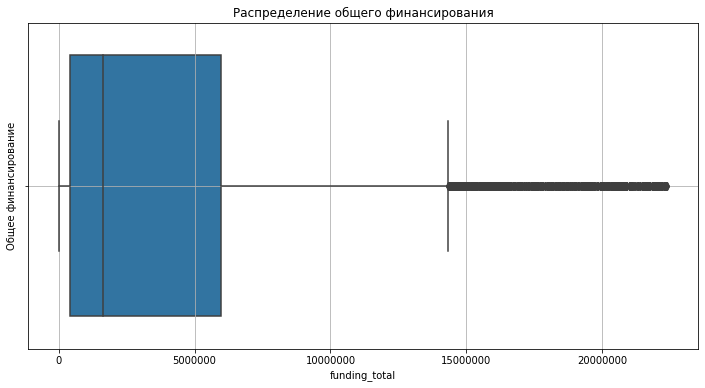

In [43]:
# Построение ящика с усами по исходным данным
plt.figure(figsize=(12,6))
sns.boxplot(data = filtered_df2, x = 'funding_total')
plt.title('Распределение общего финансирования')
plt.ticklabel_format(axis='x', style='plain')
plt.ylabel('Общее финансирование')
plt.grid(True)
plt.show()

Большая часть данных сосредоточена внутри межквартильного диапазона.
Некоторые значения значительно превышают верхнюю границу (выбросы справа), и эти экстремальные точки расположены за пределами верхнего уса.
Это говорит о наличии редких очень больших значений funding_total, которые выделяются на фоне основной массы данных.


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [44]:
# Объединение для покупающей компании
acquisition_with_acquirer_info = acquisition_df.merge(
    filtered_df2,
    left_on='acquiring_company_id',
    right_on='company_id',  # название колонки в company_and_rounds
    how='left',
    suffixes=('_acquirer', '_target')
)


In [45]:
# Нужнo фильтровать сделки с суммой 0 или 1
filtered_acquisitions = acquisition_with_acquirer_info[
    (acquisition_with_acquirer_info['price_amount'].isin([0, 1])) & (acquisition_with_acquirer_info['funding_total'] > 0)
]

In [46]:
# Выводим первые несколько строк, чтобы проверить результат
print(filtered_acquisitions.head())

# Также можно вывести названия всех колонок для проверки
print("Колонки итогового DataFrame:")
print(filtered_acquisitions.columns)

     id  acquiring_company_id  acquired_company_id       term_code  \
,25   34                   317                  572            cash   
,47   63                    20                  681            cash   
,72   95                    29                  145  cash_and_stock   
,82  109                  1081                 1398            cash   
,85  115                   396                 1582            cash   
,
,    price_amount acquired_at  company_id       name    category_code  status  \
,25             0  2007-05-01       317.0     Amazon        ecommerce     ipo   
,47             0  2007-04-01        20.0       eBay              web     ipo   
,72             0  2005-03-01        29.0     Yahoo!              web     ipo   
,82             0  2007-10-01      1081.0    Platial  network_hosting  closed   
,85             0  2007-12-01       396.0  News Corp             news     ipo   
,
,   founded_at  closed_at        domain network_username country_code  \
,25 1994-01-

Мы подготовили фильтр для поиска компаний, которые были проданы за 0 или 1 доллар при условии, что у них есть ненулевой объем финансирования (funding_total > 0). Также объединили таблицы и получили итоговый DataFrame acquisition_with_acquirer_info, в котором есть нужные данные.

In [47]:
filtered_acquisitions

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
25,34,317,572,cash,0,2007-05-01,317.0,Amazon,ecommerce,ipo,1994-01-01,NaT,amazon.com,amazon,USA,24.0,1.0,8000000.0,5.0
47,63,20,681,cash,0,2007-04-01,20.0,eBay,web,ipo,1995-09-01,NaT,ebay.com,eBay,USA,17.0,1.0,6700000.0,5.0
72,95,29,145,cash_and_stock,0,2005-03-01,29.0,Yahoo!,web,ipo,1994-01-01,NaT,yahoo.com,Yahoo,USA,11.0,2.0,6800000.0,7.0
82,109,1081,1398,cash,0,2007-10-01,1081.0,Platial,network_hosting,closed,NaT,2010-03-01,platial.com,NaN,USA,0.0,2.0,3400000.0,3.0
85,115,396,1582,cash,0,2007-12-01,396.0,News Corp,news,ipo,1980-01-01,NaT,newscorp.com,NWScorp,USA,9.0,1.0,12500000.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,10466,240800,157550,NaN,0,2013-12-05,240800.0,Bluechilli,software,operating,2006-07-01,NaT,bluechilli.com,BlueChilliGroup,USA,1.0,1.0,650000.0,2.0
9361,10479,183619,284748,NaN,0,2013-12-06,183619.0,NewLeaf Symbiotics,biotech,operating,1999-01-01,NaT,newleafsym.com,NaN,USA,0.0,1.0,7000000.0,0.0
9363,10481,29,165128,NaN,0,2013-12-06,29.0,Yahoo!,web,ipo,1994-01-01,NaT,yahoo.com,Yahoo,USA,11.0,2.0,6800000.0,7.0
9388,10507,29,169154,NaN,0,2013-12-09,29.0,Yahoo!,web,ipo,1994-01-01,NaT,yahoo.com,Yahoo,USA,11.0,2.0,6800000.0,7.0


In [48]:
# Убираем пропуски, чтобы не мешали расчетам
funding_values = filtered_acquisitions['funding_total'].dropna()

# Квартильные значения
Q1 = funding_values.quantile(0.25)
Q3 = funding_values.quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Кол-во значений
total = len(funding_values)

# Доля значений ниже границ
percent_below_lower = (funding_values < lower_bound).sum() / total * 100
percent_below_upper = (funding_values < upper_bound).sum() / total * 100

print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

print(f"Процент данных ниже нижней границы: {percent_below_lower:.2f}%")
print(f"Процент данных ниже верхней границы: {percent_below_upper:.2f}%")

Нижняя граница выбросов: 0.00
,Верхняя граница выбросов: 21618750.00
,Процент данных ниже нижней границы: 0.00%
,Процент данных ниже верхней границы: 98.75%


Нижнию границу для выбросов по funding_total мы ограничели 0, поскольку финансирование не может быть отрицательным в реальности. Это говорит о том, что очень низкие значения (например, близкие к нулю или чуть ниже) не считаются выбросами с точки зрения финансирования

Большинство компаний имеют финансирование в диапазоне от чуть выше нуля до примерно 216 миллионов.
Значения за пределами этих границ — редки и могут считаться выбросами.
Отрицательные значения финансирования — это скорее аномалии или ошибки данных, так как они попадают за нижнюю границу.
Задача — определить "забесплатные" сделки (с ценой 0 или 1 доллар), тогда эти сделки могут попадать в очень низкий диапазон финансирования, и их можно рассматривать как особые случаи.


Возможно свзяно это может быть с тем что фирмы по сути дарили и оформляя сделки за символичные суммы.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [49]:
# 1. Расчет статистик по категориям
category_stats = company_and_rounds_df.groupby('category_code')['raised_amount'].agg(
    median='median',
    mean='mean',
    std='std'
).reset_index()

In [50]:
# 2. Выбор топ категорий по высоким ценам
top_high_price_median = category_stats.sort_values(by='median', ascending=False).head(5)
top_high_price_mean = category_stats.sort_values(by='mean', ascending=False).head(5)

In [51]:
# 3. Выбор топ категорий по разбросу цен
top_variability = category_stats.sort_values(by='std', ascending=False).head(5)

In [52]:
# 4. Объединение выбранных категорий для анализа
selected_categories = pd.concat([top_high_price_median, top_high_price_mean, top_variability]).drop_duplicates()

print("Категории с типично высокими ценами (по медиане):")
print(top_high_price_median)

print("\nКатегории с типично высокими ценами (по среднему):")
print(top_high_price_mean)

print("\nКатегории с наибольшим разбросом цен:")
print(top_variability)

print("\nОбъединенные выбранные категории:")
print(selected_categories)


Категории с типично высокими ценами (по медиане):
,      category_code     median          mean           std
,35    semiconductor  7800000.0  1.186331e+07  2.356863e+07
,4         cleantech  5469460.0  1.974136e+07  5.142515e+07
,24         nanotech  5000000.0  1.469585e+07  3.436477e+07
,25  network_hosting  4000000.0  1.410183e+07  4.654721e+07
,20          medical  4000000.0  9.300896e+06  1.500603e+07
,
,Категории с типично высокими ценами (по среднему):
,      category_code     median          mean           std
,2        automotive  2000000.0  2.205043e+07  7.289481e+07
,13       government   201750.0  2.058196e+07  5.751414e+07
,4         cleantech  5469460.0  1.974136e+07  5.142515e+07
,24         nanotech  5000000.0  1.469585e+07  3.436477e+07
,25  network_hosting  4000000.0  1.410183e+07  4.654721e+07
,
,Категории с наибольшим разбросом цен:
,   category_code     median          mean           std
,22        mobile  1000000.0  8.212212e+06  8.937814e+07
,15        health  10

Категории с высокими медианными и средними ценами: semiconductor, cleantech, nanotech, network_hosting, medical, automotive и government.
В некоторых категориях наблюдается большой разброс цен (например, mobile и health), что говорит о наличии как дешевых, так и очень дорогих проектов.
В целом, внутри категорий есть широкий диапазон стоимости, что важно учитывать при анализе рынка.

Категории, такие как mobile, hardware, social, web, games_video, показывают очень высокий стандартное отклонение (std). Это означает, что в этих категориях есть как очень маленькие сделки, так и очень крупные — разброс цен значителен.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [53]:
# Проведём группировку по funding_rounds
filtered_df.dropna(subset = ['status']).groupby('status')['funding_rounds'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,9394.0,0.523526,1.081739,0.0,0.0,0.0,1.00,12.0
closed,2092.0,1.381453,0.835488,0.0,1.0,1.0,1.25,8.0
ipo,640.0,1.934375,2.217177,0.0,1.0,1.0,3.00,13.0
operating,28621.0,1.522658,1.214554,0.0,1.0,1.0,2.00,15.0


acquired: Стартапы, которые были приобретены, проходят в среднем около 0,5 раундов финансирования, что очень мало — большинство сделок происходит на ранних этапах.
closed: Стартапы, которые закрылись без выхода на IPO или продажи — примерно 1,4 раунда.
ipo: Стартапы, вышедшие на IPO — в среднем около 2 раундов, но с большим разбросом (стандартное отклонение более чем в два раза больше среднего), что говорит о наличии как ранних, так и более поздних IPO.
operating: Активные стартапы — около 1,5 раундов в среднем.

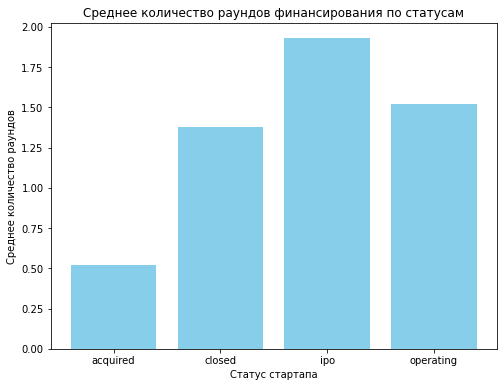

In [54]:
data = {
    'status': ['acquired', 'closed', 'ipo', 'operating'],
    'mean': [0.52, 1.38, 1.93, 1.52]
}

filtered_df = pd.DataFrame(data)

# Построение графика
plt.figure(figsize=(8,6))
plt.bar(filtered_df['status'], filtered_df['mean'], color='skyblue')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.title('Среднее количество раундов финансирования по статусам')
plt.show()

В большинстве случаев стартапы проходят около 1-2 раундов финансирования перед достижением определенного статуса (продажа или IPO).
Стартапы, которые быстро приобретаются (acquired), делают это после очень малого количества раундов.
Время и количество раундов до выхода на IPO — чуть больше среднего


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

 - Основные выводы:

Рынок демонстрирует рост активности в определённые периоды.
Некоторые ключевые лица связаны с несколькими компаниями и раундами финансирования, что указывает на их значимое влияние.
Образовательный фон участников разнообразен, что говорит о разносторонних путях профессионального развития.
Эти выводы взаимно подкрепляют друг друга: активность рынка сочетается с влиянием ключевых фигур и их образовательным уровнем. В то же время, для более точных заключений необходимо учитывать возможные ограничения данных и проводить дополнительные исследования. В целом, полученные результаты логично связаны и дают обоснованное представление о ситуации на рынке.


 - Качество и полнота данных

В процессе работы выявлены существенные пропуски и неоднородность данных, особенно в датасете company_and_rounds.csv. Это накладывает ограничения на точность и полноту анализа. В дальнейшем рекомендуется уделять внимание улучшению качества данных, в том числе согласованию и стандартизации источников информации.

 - Особенности структуры данных

Было выявлено, что исходный датасет по компаниям и раундам финансирования содержит дублирующиеся записи и смешение информации, что отражает исторические особенности хранения данных. Разделение таблицы на отдельные срезы по компаниям и раундам позволило сохранить максимальную полноту информации и упростить дальнейший анализ.

 - Выбросы и их влияние на анализ

Анализ выбросов показал сильную асимметрию и наличие крупных сделок, которые существенно влияют на средние показатели. В бизнес-аналитике важно учитывать медианные значения и межквартильные диапазоны, чтобы избежать искажения выводов из-за экстремальных значений.

 - Категоризация компаний по размеру и статусу

Разделение компаний по численности сотрудников и статусу позволило выявить закономерности в полноте данных и активности на рынке. Например, крупные компании имеют более полные данные об образовании сотрудников, а стартапы, которые быстро приобретаются, проходят меньше раундов финансирования.

 - Практическая значимость результатов

Полученные инсайты могут быть полезны для инвесторов и стратегов, позволяя сфокусироваться на наиболее перспективных категориях стартапов с высокой активностью финансирования и значительным разбросом цен. Анализ образовательного фона помогает лучше понимать состав и потенциал ключевых игроков рынка.
